<a href="https://colab.research.google.com/github/minhnghi123/ml_projects/blob/master/spam_emails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ML/spam_emails')

In [15]:
data = pd.read_csv('dataset/spam_ham_dataset.csv')
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [17]:
data.shape

(5171, 4)

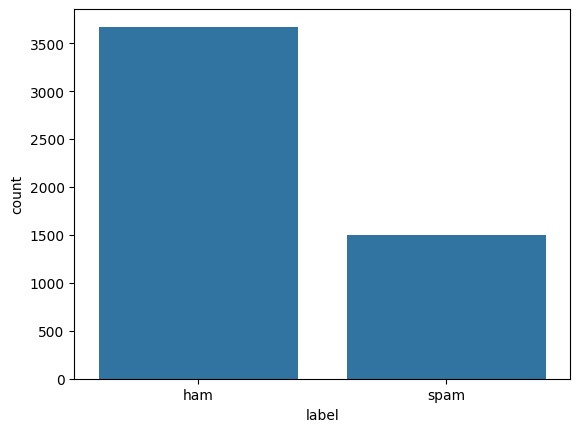

In [20]:
sns.countplot(data=data, x='label')
plt.show()

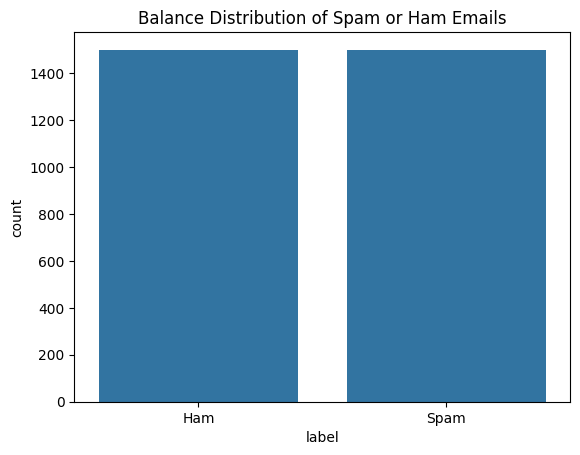

In [29]:
#Balance Dataset
ham_msg = data[data['label'] == 'ham']
spam_msg =  data[data['label']=='spam']

#downsample ham emails to match the number of spam emails
ham_msg_balanced = ham_msg.sample(n=len(spam_msg), random_state=42)

#combine balanced data

balanced_data = pd.concat([ham_msg_balanced, spam_msg]).reset_index(drop=True)


#visualize the balanced dataset
sns.countplot(data = balanced_data,x='label')
plt.title('Balance Distribution of Spam or Ham Emails')
plt.xticks(ticks=[0,1], labels=['Ham','Spam'])
plt.show()


In [35]:
#Clean the dataset

balanced_data['text'] = balanced_data['text'].str.replace('Subject','')
balanced_data

,Unnamed: 0,label,text,label_num
0,3444,ham,: conoco - big cowboy\r\ndarren :\r\ni ' m not...,0
1,2982,ham,: feb 01 prod : sale to teco gas processing\r\...,0
2,2711,ham,": california energy crisis\r\ncalifornia  , s...",0
3,3116,ham,: re : nom / actual volume for april 23 rd\r\n...,0
4,1314,ham,: eastrans nomination changes effective 8 / 2 ...,0
...,...,...,...,...
2993,4381,spam,: pictures\r\nstreamlined denizen ajar chased\...,1
2994,4979,spam,: penny stocks are about timing\r\nnomad inter...,1
2995,4162,spam,: anomaly boys from 3881\r\nuosda apaproved ml...,1
2996,4365,spam,: slutty milf wants to meet you\r\ntake that !...,1


In [39]:
punctuations_list  = string.punctuation
def remove_punctuations(text) :
  temp = str.maketrans('','',punctuations_list)
  return text.translate(temp)
balanced_data['text'] =  balanced_data['text'].apply(lambda x: remove_punctuations(x))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy\r\ndarren \r\ni m not sur...,0
1,2982,ham,feb 01 prod sale to teco gas processing\r\ns...,0
2,2711,ham,california energy crisis\r\ncalifornia  s p...,0
3,3116,ham,re nom actual volume for april 23 rd\r\nwe ...,0
4,1314,ham,eastrans nomination changes effective 8 2 0...,0


In [41]:
#remove stop words

def remove_stopwords(text):
  stop_words =  stopwords.words('english')
  imp_words = []
  #storing important words
  for word in str(text).split() :
    word = word.lower()
    if word not in stop_words :
      imp_words.append(word)
  output = " ".join(imp_words)
  return output
balanced_data['text'] = balanced_data['text'].apply(lambda text: remove_stopwords(text))
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,conoco big cowboy darren sure help know else a...,0
1,2982,ham,feb 01 prod sale teco gas processing sale deal...,0
2,2711,ham,california energy crisis california  power cr...,0
3,3116,ham,nom actual volume april 23 rd agree eileen pon...,0
4,1314,ham,eastrans nomination changes effective 8 2 00 p...,0


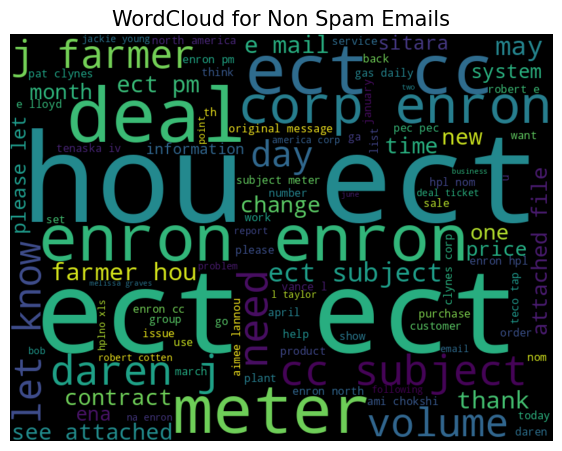

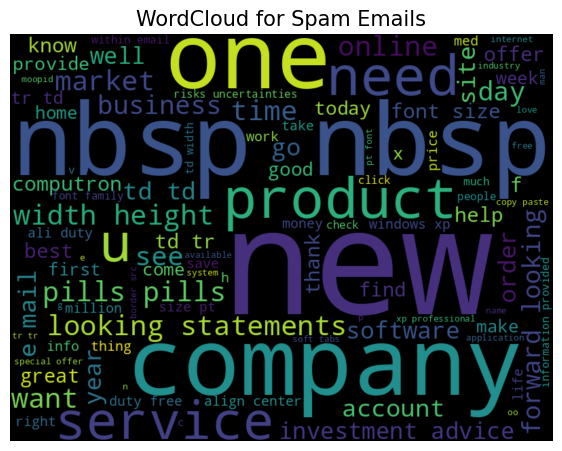

In [53]:
#visualization Word Cloud
def plot_word_cloud(data,typ) :
  email_corpus = " ".join(data['text'])
  wc =  WordCloud(background_color='black',max_words=100,width=800,height=600).generate(email_corpus)
  plt.figure(figsize=(7,7))
  plt.imshow(wc, interpolation='bilinear')
  plt.title(f'WordCloud for {typ} Emails', fontsize=15)
  plt.axis('off')
  plt.show()

plot_word_cloud(balanced_data[balanced_data['label']=='ham'],typ = 'Non Spam')
plot_word_cloud(balanced_data[balanced_data['label']=='spam'],typ = 'Spam')